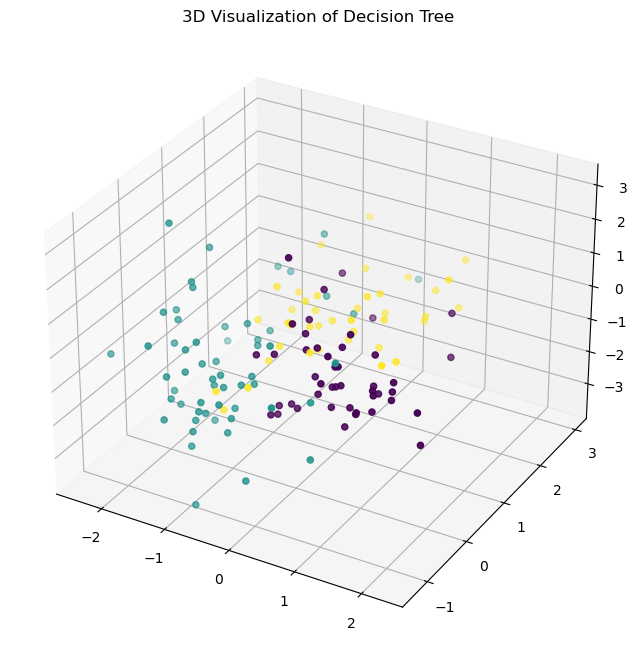

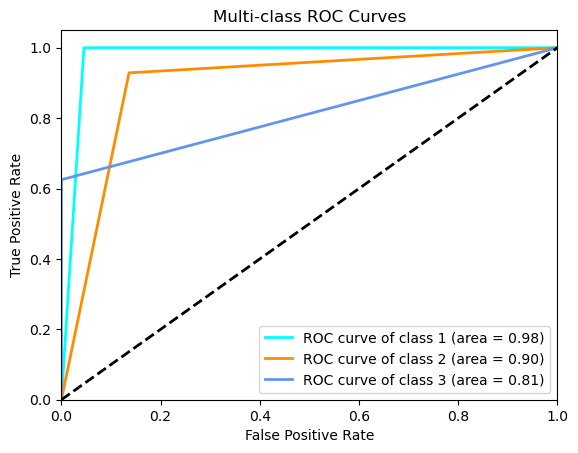

The model accuracy is: 94.44%


In [2]:
# Importar bibliotecas adicionales necesarias para la visualización 3D y la curva ROC
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier

# Lectura del conjunto de datos
wine_dataset = pd.read_csv('C:/anaconda_data/wine.data', header=None, delimiter=',')
column_names = ['WineType'] + [f'Attribute_{i+1}' for i in range(13)]
wine_dataset.columns = column_names

# División del conjunto de datos
Features = wine_dataset.drop('WineType', axis=1)
Labels = wine_dataset['WineType']
Train_Features, Test_Features, Train_Labels, Test_Labels = train_test_split(Features, Labels, test_size=0.2, random_state=42)

# Estandarización de las características
feature_scaler = StandardScaler()
Train_Features_Scaled = feature_scaler.fit_transform(Train_Features)
Test_Features_Scaled = feature_scaler.transform(Test_Features)

# Entrenamiento del modelo de árbol de decisión
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(Train_Features_Scaled, Train_Labels)

# Predicción y Evaluación
Predicted_Outcome = decision_tree_model.predict(Test_Features_Scaled)
model_accuracy_rate = accuracy_score(Test_Labels, Predicted_Outcome)

# Visualización en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Train_Features_Scaled[:, 0], Train_Features_Scaled[:, 1], Train_Features_Scaled[:, 2], c=Train_Labels, marker='o')
plt.title('3D Visualization of Decision Tree')
plt.show()

# Curva ROC (parte adicional)
# Binarizar las etiquetas para prepararlas para la curva ROC
Labels_Binarized = label_binarize(Labels, classes=[1, 2, 3])
n_classes = Labels_Binarized.shape[1]

# Entrenar el modelo usando OneVsRestClassifier
decision_tree_model = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
decision_tree_model.fit(Train_Features_Scaled, label_binarize(Train_Labels, classes=[1, 2, 3]))
Predicted_Scores = decision_tree_model.predict_proba(Test_Features_Scaled)

# Calcular la curva ROC y el área AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(label_binarize(Test_Labels, classes=[1, 2, 3])[:, i], Predicted_Scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva ROC para cada clase
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {i+1} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curves')
plt.legend(loc="lower right")
plt.show()

# Imprimir la precisión del modelo
print(f'The model accuracy is: {model_accuracy_rate * 100:.2f}%')
